# 5)


In [2]:
from PIL import Image, ImageOps, ImageFilter, ImageEnhance

# Открытие изображения
img = Image.open("../1.png")

# Увеличение/уменьшение интенсивности яркости и отдельных цветовых каналов
enhancer = ImageEnhance.Brightness(img)
img_bright = enhancer.enhance(1.5)  # увеличение яркости на 50%
img_dark = enhancer.enhance(0.5)  # уменьшение яркости на 50%

r, g, b = img.split()
r = r.point(lambda i: i * 1.5)  # увеличение интенсивности красного канала
g = g.point(lambda i: i * 0.5)  # уменьшение интенсивности зеленого канала
b = b.point(lambda i: i * 0.5)  # уменьшение интенсивности синего канала
img_adjusted = Image.merge("RGB", (r, g, b))

# Повышение/снижение контрастности изображения
contrast = ImageEnhance.Contrast(img)
img_high_contrast = contrast.enhance(2.0)  # повышение контрастности в 2 раза
img_low_contrast = contrast.enhance(0.5)  # снижение контрастности в 2 раза

# Получение негатива яркости или цветовых каналов
img_negative = ImageOps.invert(img)

# Обмен цветовых каналов
r, g, b = img.split()
new_img = Image.merge("RGB", (g, r, b))  # обмен красного и зеленого каналов

# Выполнение симметричного отображения изображения по горизонтали или вертикали
flipped_img_horizontal = img.transpose(Image.FLIP_LEFT_RIGHT)
flipped_img_vertical = img.transpose(Image.FLIP_TOP_BOTTOM)

# Удаление шума методом размытия изображения
blurred_img_4 = img.filter(ImageFilter.BLUR)  # размытие по модели 4-связности
blurred_img_8 = img.filter(ImageFilter.BoxBlur(2))  # размытие по модели 8-связности

# Собственная идея
# Ваш код для собственной идеи

# Сохранение изображений
img_bright.save("../photos/fivepoint/bright.jpg")
img_dark.save("../photos/fivepoint/dark.jpg")
img_adjusted.save("../photos/fivepoint/adjusted.jpg")
img_high_contrast.save("../photos/fivepoint/high_contrast.jpg")
img_low_contrast.save("../photos/fivepoint/low_contrast.jpg")
img_negative.save("../photos/fivepoint/negative.jpg")
new_img.save("../photos/fivepoint/new_channels.jpg")
flipped_img_horizontal.save("../photos/fivepoint/flipped_horizontal.jpg")
flipped_img_vertical.save("../photos/fivepoint/flipped_vertical.jpg")
blurred_img_4.save("../photos/fivepoint/blurred_4.jpg")
blurred_img_8.save("../photos/fivepoint/blurred_8.jpg")

# 6)


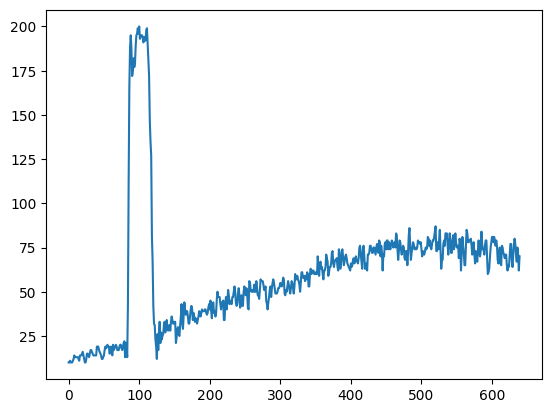

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения
img = cv2.imread("../1.png", 0)  # Загрузка в оттенках серого

# Получение профиля яркости для выбранной строки
row_number = 100  # Номер строки, для которой нужно получить профиль
row_profile = img[row_number, :]

# Визуализация профиля яркости
plt.plot(row_profile)
plt.show()

# 7)


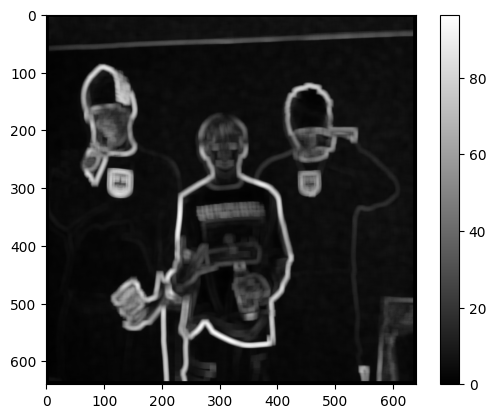

In [4]:
# Загрузка изображения
img = cv2.imread("../1.png", 0)  # Загрузка в оттенках серого


# Функция для вычисления контрастности по 4 соседям
def contrast_4_neighbors(img):
    contrast_map = np.zeros_like(img, dtype=np.float32)
    for y in range(1, img.shape[0] - 1):
        for x in range(1, img.shape[1] - 1):
            contrast_map[y, x] = (
                np.abs(int(img[y, x + 1]) - int(img[y, x]))
                + np.abs(int(img[y, x - 1]) - int(img[y, x]))
                + np.abs(int(img[y + 1, x]) - int(img[y, x]))
                + np.abs(int(img[y - 1, x]) - int(img[y, x]))
            )
    return contrast_map


# Функция для вычисления контрастности по 8 соседям
def contrast_8_neighbors(img):
    contrast_map = np.zeros_like(img, dtype=np.float32)
    for y in range(1, img.shape[0] - 1):
        for x in range(1, img.shape[1] - 1):
            contrast_map[y, x] = (
                np.abs(int(img[y, x + 1]) - int(img[y, x]))
                + np.abs(int(img[y, x - 1]) - int(img[y, x]))
                + np.abs(int(img[y + 1, x]) - int(img[y, x]))
                + np.abs(int(img[y - 1, x]) - int(img[y, x]))
                + np.abs(int(img[y + 1, x + 1]) - int(img[y, x]))
                + np.abs(int(img[y - 1, x - 1]) - int(img[y, x]))
                + np.abs(int(img[y + 1, x - 1]) - int(img[y, x]))
                + np.abs(int(img[y - 1, x + 1]) - int(img[y, x]))
            )
    return contrast_map


# Функция для вычисления контрастности по окну с задаваемым размером
def contrast_custom_window(img, window_size):
    contrast_map = np.zeros_like(img, dtype=np.float32)
    half_size = window_size // 2
    for y in range(half_size, img.shape[0] - half_size):
        for x in range(half_size, img.shape[1] - half_size):
            window = img[
                y - half_size : y + half_size + 1, x - half_size : x + half_size + 1
            ]
            contrast_map[y, x] = np.std(window)
    return contrast_map


# Выбор формулы расчёта контрастности
contrast_formula = input(
    "Выберите формулу расчёта контрастности (4 соседа, 8 соседей, или окно): "
)

if contrast_formula == "4 соседа":
    contrast_map = contrast_4_neighbors(img)
elif contrast_formula == "8 соседей":
    contrast_map = contrast_8_neighbors(img)
elif contrast_formula == "окно":
    window_size = int(input("Введите размер окна для расчёта контрастности: "))
    contrast_map = contrast_custom_window(img, window_size)
else:
    print("Неверная формула расчёта контрастности")

# Визуализация контрастной карты, если contrast_map не равно None
if contrast_map is not None:
    plt.imshow(contrast_map, cmap="gray")
    plt.colorbar()
    plt.show()
else:
    print("Не удалось вычислить контрастную карту")

# 8)


In [1]:
img = cv2.imread("../1.png")


# Функция для обработки движения мыши
def draw_rectangle(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:
        # Создание копии изображения для отрисовки рамки
        img_with_rectangle = img.copy()
        # Рисование внешней рамки окна 11x11 с центром в точке нахождения курсора
        cv2.rectangle(
            img_with_rectangle, (x - 6, y - 6), (x + 6, y + 6), (255, 255, 255), 2
        )
        # Отображение изображения с рамкой
        cv2.imshow("Image with Rectangle", img_with_rectangle)

        # Сохранение текущего варианта изображения в файл при нажатии клавиши 's'
        if cv2.waitKey(1) & 0xFF == ord("s"):
            cv2.imwrite("current_image.jpg", img)


# Отображение изображения и установка обработчика событий мыши
cv2.imshow("Image", img)
cv2.setMouseCallback("Image", draw_rectangle)

while True:
    if (
        cv2.waitKey(1) & 0xFF == 27
    ):  # Проверка на закрытие окна по нажатию клавиши 'Esc'
        break

cv2.destroyAllWindows()

error: OpenCV(4.9.0) /io/opencv/modules/highgui/src/window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
